# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [5]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [8]:
numepochs = 500
losses = torch.zeros(numepochs)
count_good_models = 0
learningRate = .05
lossfun = nn.MSELoss()

In [3]:
def train_model(x, y):
    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    for epochi in range(numepochs):
        yHat = ANNreg(x)
        loss = lossfun(y, yHat)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    predictions = ANNreg(x)
    testloss = lossfun(predictions, y)
    accuracy = np.corrcoef(y.T,predictions.detach().T)[0,1]
    return testloss, accuracy

In [2]:
def create_data(slope, N):
    x = torch.randn(N, 1)
    y = slope*x + torch.randn(N, 1)/2
    return x, y

In [18]:
slopes = np.linspace(-2, 2, 21)
num_experiment = 50
N = 50
performance_slope = np.zeros((21, 2))
for j, slope in enumerate(slopes):
    performance = np.zeros((num_experiment, 2))
    for i in range(num_experiment):
        x, y = create_data(slope, N)
        testloss, accuracy = train_model(x, y)
        performance[i, 0] = testloss
        performance[i, 1] = accuracy
    print(np.mean(performance[:,0]))
    print(performance_slope)
    performance_slope[j, 0] = np.mean(performance[:,0])
    performance_slope[j, 1] = np.mean(performance[:,1])

1.401235406398773
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
1.121368036866188
[[1.40123541        nan]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
0.7728104543685913
[[1.40123541        nan]
 [1.12136804        nan]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.

In [14]:
print(performance_slope)

[[0.83295642        nan]
 [1.18314974        nan]]


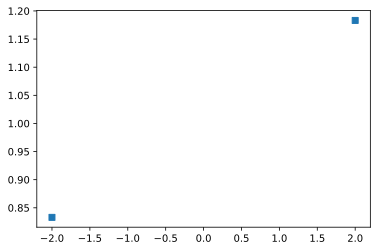

In [13]:
plt.plot(slopes, performance_slope[:,0], 's')
plt.show()

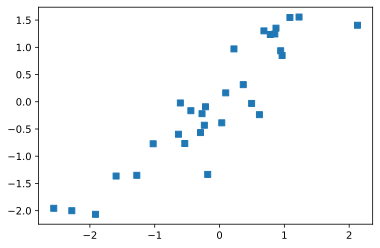

In [26]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [21]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [22]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [29]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)
count_good_models = 0

for i in range(100):
    N = 30
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/2
    losses = torch.zeros(numepochs)
## Train the model!
    for epochi in range(numepochs):

      # forward pass
      yHat = ANNreg(x)

      # compute loss
      loss = lossfun(yHat,y)
      losses[epochi] = loss

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    if losses[numepochs-1] < 0.25:
        count_good_models += 1
print(count_good_models)

63


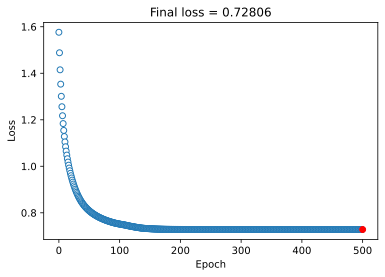

In [24]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

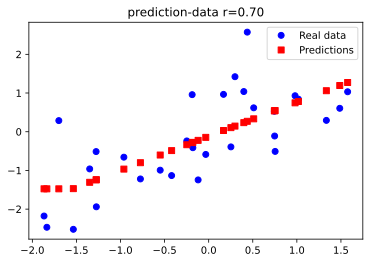

In [25]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.